# Visualização de Dados e Informações - Prática #01

### Adinan Alves de Brito Filho
### Priscila Cristina de Souza Mizukami

In [2]:
#Importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Lê csv e transforma em um dataframe 
df = pd.read_csv('Vendas.csv',encoding='windows-1252')

## Questão 1

Segundo seu chefe, o pessoal de Vendas adora Excel. Assim, eles gostariam de receber um CSV para contrastar _Sales X Profit_ segmentado por _Region_, destacando qual a média de _Discount_ aplicado.

In [4]:
#Cria novo df apenas com as colunas que vamos precisar 
df_client = df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code','Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity'])

In [5]:
#Agrupa por região
df_geral = df.groupby('Region')[['Sales','Profit']].sum()
print(df_geral)

               Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


In [6]:
#Cria um df pra cada região
df_central = df_client.loc[df['Region'] == 'Central']
df_east = df_client.loc[df['Region'] == 'East']
df_south = df_client.loc[df['Region'] == 'South']
df_west = df_client.loc[df['Region'] == 'West']

In [7]:
#Calcula média de disconto
mean_central = df_central['Discount'].mean()
mean_east = df_east['Discount'].mean()
mean_south = df_south['Discount'].mean()
mean_west = df_west['Discount'].mean()

In [8]:
#cria uma lista de médias
mediadis = [mean_central, mean_east, mean_south, mean_west]

In [9]:
#adc coluna das médias
df_geral['Discount_Media'] = mediadis
print(df_geral)

               Sales       Profit  Discount_Media
Region                                           
Central  501239.8908   39706.3625        0.240353
East     678781.2400   91522.7800        0.145365
South    391721.9050   46749.4303        0.147253
West     725457.8245  108418.4489        0.109335


In [10]:
#Exporta dados em um csv
df_geral.to_csv("Q1_vendas_regiao.csv")

## Questão 2

Já para o pessoal de marketing de produto, seu chefe indicou que eles gostariam de uma visão de _Profit_ acumulado por ano _(Order Date)_ para cada um das sub-categorias de produto _(Sub-Category)_. Marketing adora um gráfico de barras! Você pode usar a biblioteca _matplotlib_ ou _seaborn_.

In [11]:
# Convertendo a coluna 'Order Date' em um objeto datetime e extraindo o ano
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year


In [12]:
# Agrupando os dados por 'Year' e 'Sub-Category' e somando a coluna 'Profit'
df_grouped_y_sc_p = df.groupby(['Year', 'Sub-Category'])['Profit'].sum().reset_index()

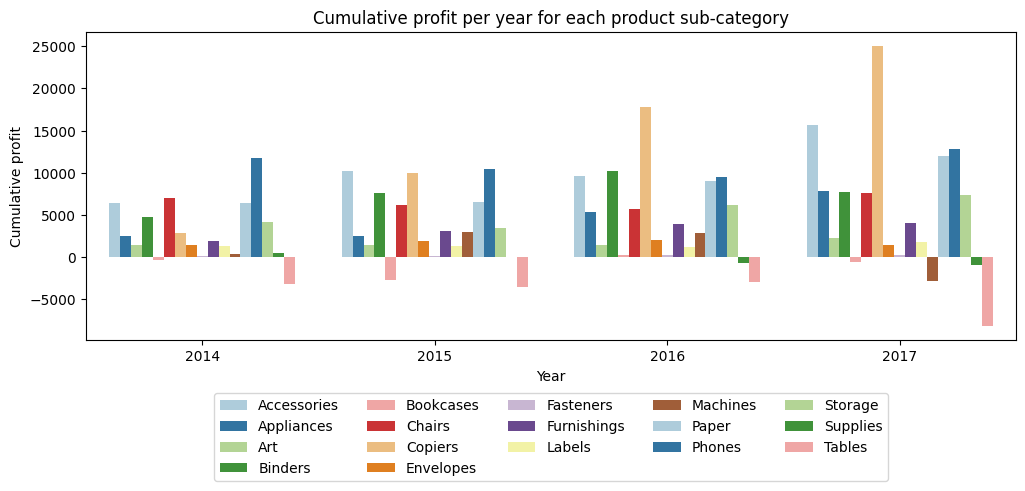

In [17]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(12,4))

# Criando o gráfico de barras
sns.barplot(x='Year', y='Profit', hue='Sub-Category', data=df_grouped_y_sc_p, palette="Paired")

# Definindo a posição da legenda para abaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Adicionando rótulos dos eixos e título, e plotando
plt.xlabel('Year')
plt.ylabel('Cumulative profit')
plt.title('Cumulative profit per year for each product sub-category')
plt.show()


## Questão 3

Já para o pessoal de marketing de produto, seu chefe indicou que eles gostariam de uma visão de _Profit_ acumulado por ano _(Order Date)_ para cada um das sub-categorias de produto _(Sub-Category)_. Marketing adora um gráfico de barras! Você pode usar a biblioteca _matplotlib_ ou _seaborn_.